### **Nombre:** Elda Magally Calderón Motta
### **Carné:** 16003182
### **Sección:** Virtual

# Proyecto Final Statistical Learning II

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [5]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

In [6]:
import numpy as np
import pandas as pd
import sklearn as sl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from scipy import stats

## Primera Parte - Red Neuronal Feed Forward MLP

In [7]:
data = pd.read_excel('datasets_738_1370_glass2.xlsx')  
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Normalizacion

In [8]:
data.iloc[:,0:9] = (data.iloc[:,0:9] - data.iloc[:,0:9].mean()) / data.iloc[:,0:9].std()

## Division de la data en Train, Test, Validation

In [9]:
Train, Test = train_test_split(data, test_size=0.20, shuffle=True)

In [10]:
Train, Validation = train_test_split(Train, test_size=0.20, shuffle=True)

## Analisis Exploratorio de la Data

In [11]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 73 to 78
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      136 non-null    float64
 1   Na      136 non-null    float64
 2   Mg      136 non-null    float64
 3   Al      136 non-null    float64
 4   Si      136 non-null    float64
 5   K       136 non-null    float64
 6   Ca      136 non-null    float64
 7   Ba      136 non-null    float64
 8   Fe      136 non-null    float64
 9   Type    136 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 11.7 KB


In [12]:
Train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,-0.048902,0.051255,-0.008444,0.056151,-0.013168,0.032248,-0.069579,0.076361,-0.037223,2.580882
std,1.007082,1.079903,0.999188,1.052469,1.094767,1.199295,0.926152,1.086380,0.963165,1.774532
min,-2.375945,-3.279254,-1.861147,-2.213046,-3.667872,-0.762132,-2.225313,-0.352051,-0.585079,1.000000
25%,-0.632370,-0.585168,-0.562970,-0.510559,-0.414352,-0.578137,-0.507298,-0.352051,-0.585079,1.000000
50%,-0.256982,-0.181055,0.551486,-0.140018,0.257009,0.081178,-0.282445,-0.352051,-0.585079,2.000000
75%,0.259175,0.645539,0.629480,0.375736,0.579779,0.157843,0.128614,-0.352051,0.364236,3.250000
max,5.125215,4.864232,0.898128,4.116199,3.562172,8.759606,5.082401,5.983182,3.212180,6.000000


## Verificando si existen datos NAN

In [13]:
Train.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [14]:
Test.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
Validation.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## Separando Features y Labels

### Datos Train

In [46]:
y_train = Train.iloc[:,9]
train = Train.iloc[:,0:9]

In [47]:
y_train.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

### Datos Test

In [48]:
y_test = Test.iloc[:,9]
test = Test.iloc[:,0:9]

### Datos Validation

In [49]:
y_validation = Validation.iloc[:,9]
validation = Validation.iloc[:,0:9]

## Modelos MLP

In [31]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.optimizers import Adamax
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import Adadelta
from keras.optimizers import Adagrad
from keras.optimizers import Nadam
from keras.layers.normalization import BatchNormalization
import keras_metrics
from keras.layers import LeakyReLU
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

# Planteamiento Inicial

El problema de predicción a tratar en este experimento es de clasificación de tipos de vidrio. El dataset cuenta con 9 features relacionadas a los componentes del vidrio y la respectiva etiqueta, siendo los tipos de vidrio de un tipo numerados del 1 al 6.

Por tanto se construirá una red neuronal del tipo MLP para predecir el tipo de vidrio según las features de entrada.

Dado la cantidad de features presentes en el dataset se empezará con la construcción de una red neuronal con 4 capas ocultas, 1 de entrada y 1 de salida para poder capturar las variables intermedias necesarias y se empleará en la salida una activación softmax para hacer la clasificación. Se probará con diferentes optimizadores para evaluar el rendimiento del modelo.

Se espera que con este primer enfoque se logre un nivel aceptable en la clasificación. Posteriormente según los resultados obtenidos se empezará con otras fases de experimentación para probar con diferentes hiperparámetros como la cantidad de capas, número de neuronas, tamaño del batch para hacer la selección final.

Para esto se empleará un análisis de métricas con dataset de training y validation para evaluar el modelo y hacer la selección final.

### Primera Fase Experimentacion

En la primer fase de experimentación se probará con diferentes tipos de optimizadores, se elegirá el que mejor resultado brinde con la función de costo y la exactitud para una segunda fase de experimentación

#### Optimizer: Adamax    Activation: Relu

In [936]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation='relu')) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation='relu', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation='relu', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation='relu', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [912]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adamax(learning_rate=0.05), 
              metrics=['accuracy'])

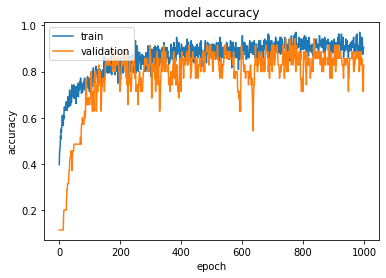

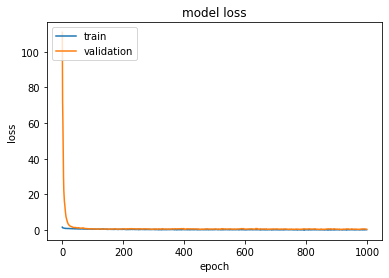

In [913]:
history = model.fit(train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Optimizer: Adam    Activation: Relu

In [916]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adam(learning_rate=0.05), 
              metrics=['accuracy'])

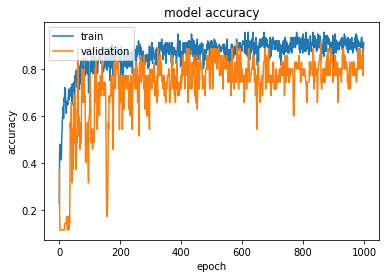

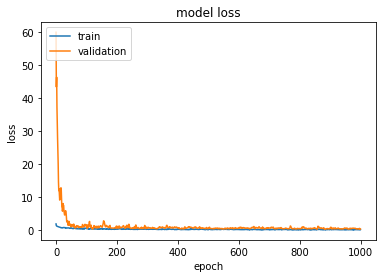

In [917]:
history = model.fit(train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Optimizer: SGD    Activation: Relu

In [919]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=SGD(learning_rate=0.05, nesterov = True), 
              metrics=['accuracy'])

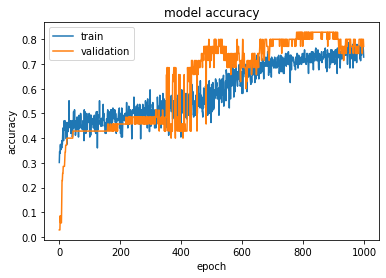

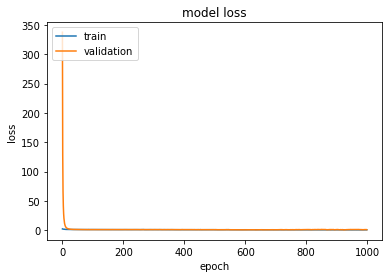

In [920]:
history = model.fit(train, y_train, epochs=1000, batch_size=50, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Optimizer: RMSprop    Activation: Relu

In [922]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=RMSprop(learning_rate=0.05), 
              metrics=['accuracy'])

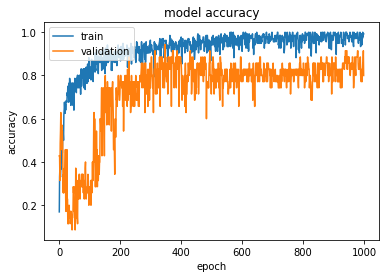

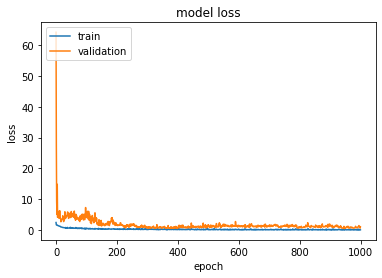

In [923]:
history = model.fit(train, y_train, epochs=1000, batch_size=50, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Optimizer: Adadelta    Activation: Relu

In [925]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adadelta(learning_rate=0.05), 
              metrics=['accuracy'])

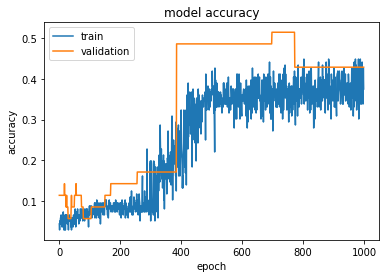

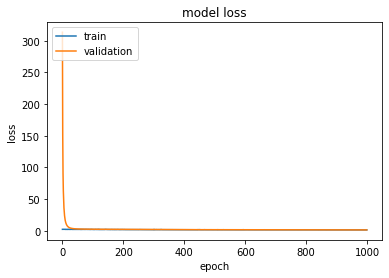

In [926]:
history = model.fit(train, y_train, epochs=1000, batch_size=50, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Optimizer: Adagrad    Activation: Relu

In [928]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

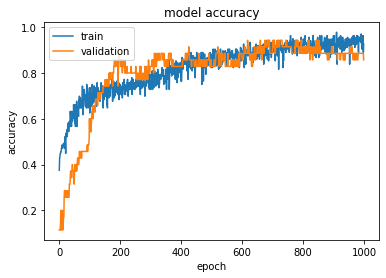

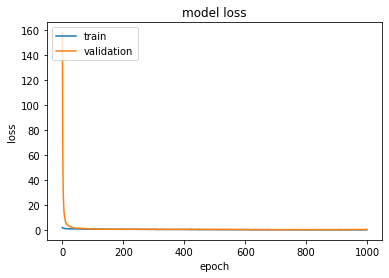

In [929]:
history = model.fit(train, y_train, epochs=1000, batch_size=50, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Optimizer: Adamax    Activation: Relu

In [931]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adamax(learning_rate=0.05), 
              metrics=['accuracy'])

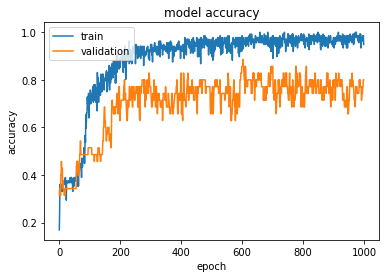

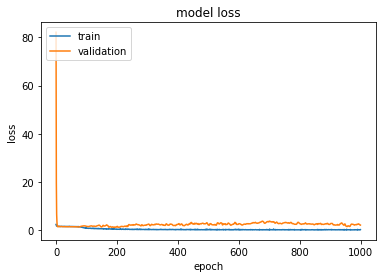

In [932]:
history = model.fit(train, y_train, epochs=1000, batch_size=50, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Optimizer: Nadam    Activation: Relu

In [934]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Nadam(learning_rate=0.05), 
              metrics=['accuracy'])

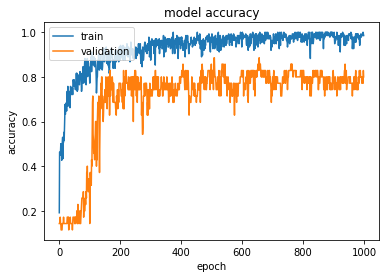

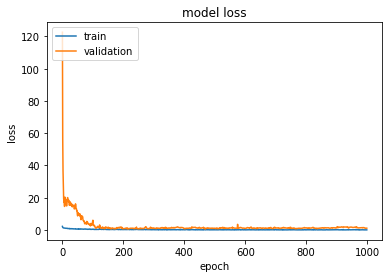

In [935]:
history = model.fit(train, y_train, epochs=1000, batch_size=50, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Optimizer: SGD    Activation: Relu

In [937]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=SGD(learning_rate=0.01, nesterov = False), 
              metrics=['accuracy'])

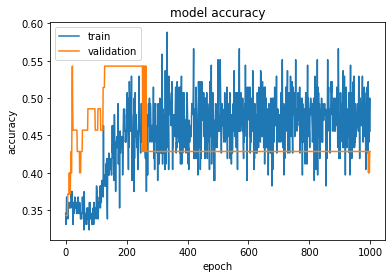

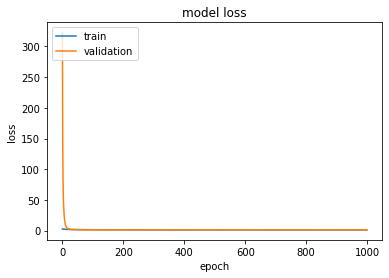

In [938]:
history = model.fit(train, y_train, epochs=1000, batch_size=50, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Se puede observar en los gráficos de Accuracy y Loss que los modelos con los optimizadores de Adamax, GD con Nesterov y Adagrad son los que brindan un mejor desempeño por el accuracy alcanzado y la velocidad de entrenamiento.

Por tanto se elegirán estos tres para una segunda fase de experimentación donde se probará cambiar la función de activación, el tamaño del batch y la estructura de la red neuronal.

#### Segunda Fase Experimentacion

#### Adamax Batch de 32

In [957]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation='relu')) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation='relu', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation='relu', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation='relu', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [959]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adamax(learning_rate=0.5), 
              metrics=['accuracy'])

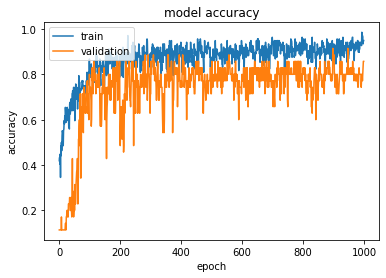

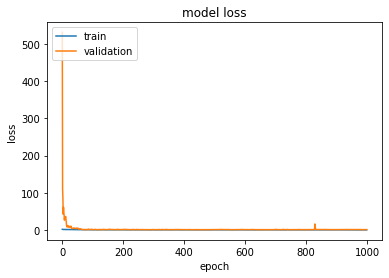

In [950]:
history = model.fit(train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Adamax Batch de 10

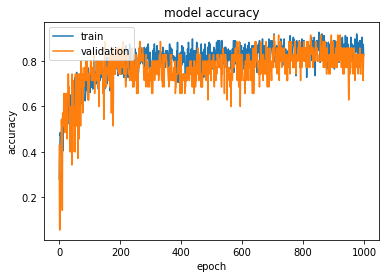

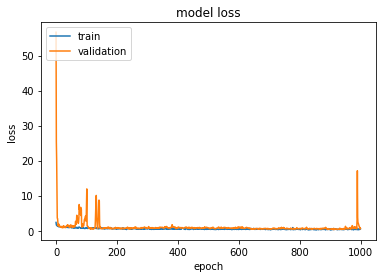

In [960]:
history = model.fit(train, y_train, epochs=1000, batch_size=10, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Adamax Batch de 32 y Activacion LeakyRelu

In [996]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [997]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adamax(learning_rate=0.5), 
              metrics=['accuracy'])

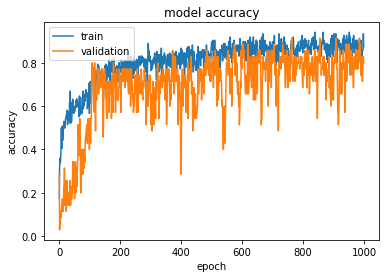

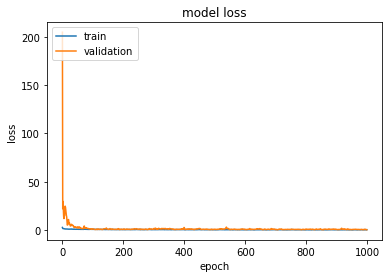

In [998]:
history = model.fit(train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Adamax Batch de 10 y Activacion LeakyRelu

In [1000]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [1001]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adamax(learning_rate=0.5), 
              metrics=['accuracy'])

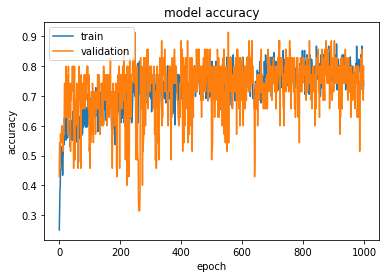

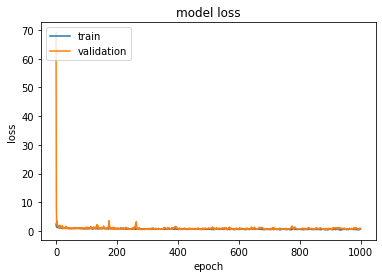

In [1002]:
history = model.fit(train, y_train, epochs=1000, batch_size=10, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Nesterov Batch de 32 y Activacion LeakyRelu

In [1004]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [1005]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=SGD(learning_rate=0.05, nesterov = False), 
              metrics=['accuracy'])

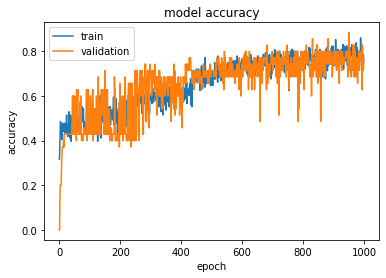

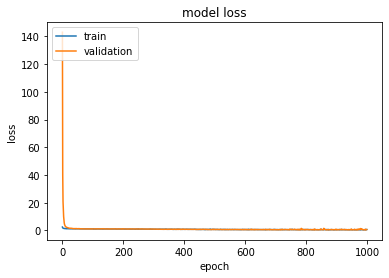

In [1006]:
history = model.fit(train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Nesterov Batch de 10 y Activacion LeakyRelu

In [1007]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

C:\Users\Elda Calderon\anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [1008]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=SGD(learning_rate=0.05, nesterov = False), 
              metrics=['accuracy'])

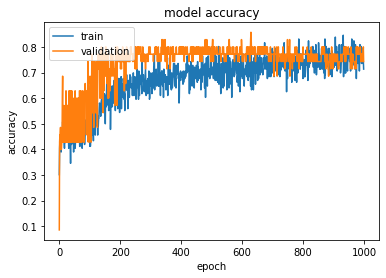

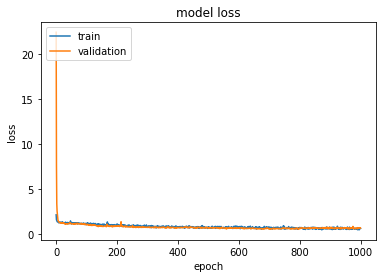

In [1009]:
history = model.fit(train, y_train, epochs=1000, batch_size=10, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Adagrad Batch de 32 y Activacion LeakyRelu

In [1012]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [1013]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

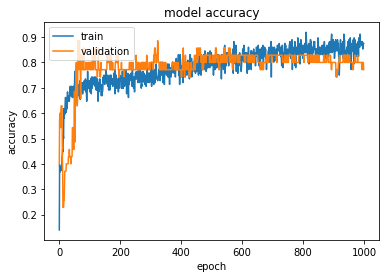

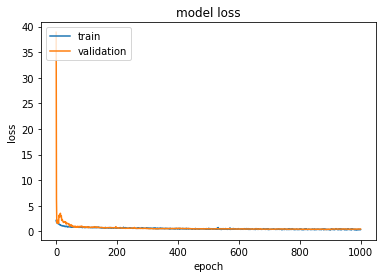

In [1014]:
history = model.fit(train, y_train, epochs=1000, batch_size=32, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Adagrad Batch de 10 y Activacion LeakyRelu

In [1039]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

C:\Users\Elda Calderon\anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [1040]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

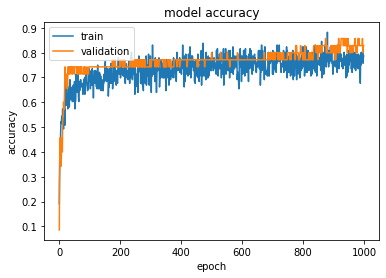

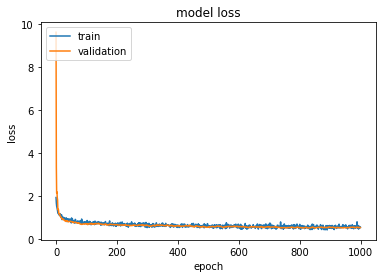

In [1041]:
history = model.fit(train, y_train, epochs=1000, batch_size=10, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Luego de los experimentos realizados con la función de activación se puede observar que tanto Relu como LeakyRelu brindan resultados muy similares para este dataset. Sin embargo, puede verse que para el modelo que tiene optimizador Adagrad y tamano de batch de 10 es el que mejor accuracy presenta para datos train y de validation. Por lo que se escogerá este modelo para la siguiente fase de experimentación.

En la siguiente parte se procederá a experimentar con la arquitectura del modelo para ver como varian los resultados.

### Tercera Fase Experimentacion

#### Modelo con optimizer Adagrad, activación LeakyRelu, tamaño de batch pequeño (<20)
#### Agregando una capa mas:

In [1048]:
model = Sequential()
model.add(Dense(20, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(15, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(12, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [1050]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

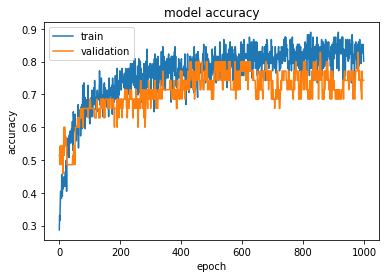

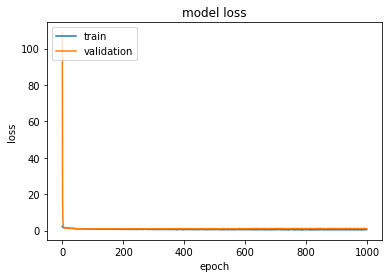

In [1051]:
history = model.fit(train, y_train, epochs=1000, batch_size=15, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Quitando una capa:

In [1053]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(10, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [1054]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

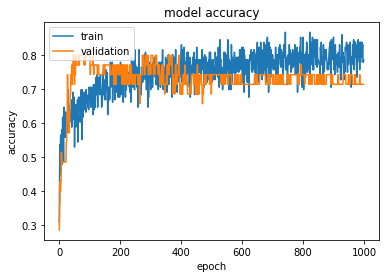

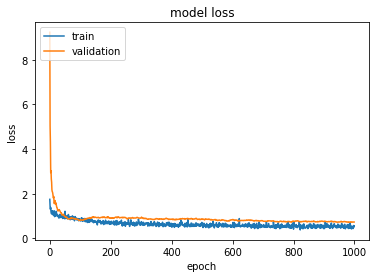

In [1055]:
history = model.fit(train, y_train, epochs=1000, batch_size=15, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### 5 capas diferente configuracion de neuronas

In [1057]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(16, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [1058]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

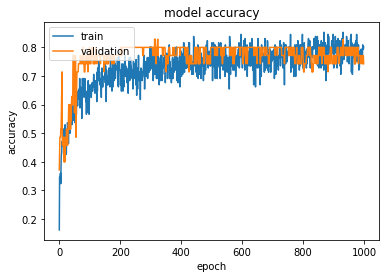

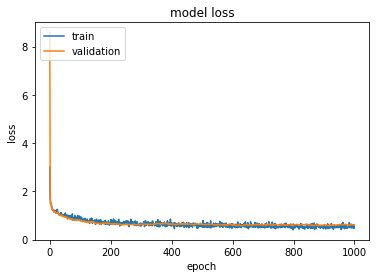

In [1059]:
history = model.fit(train, y_train, epochs=1000, batch_size=10, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### 5 capas con mas neuronas

In [1065]:
model = Sequential()
model.add(Dense(25, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(18, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(12, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [1066]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

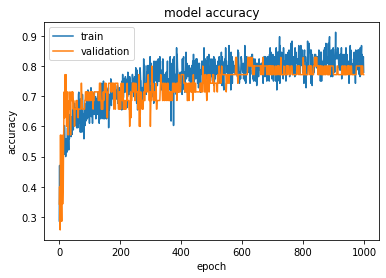

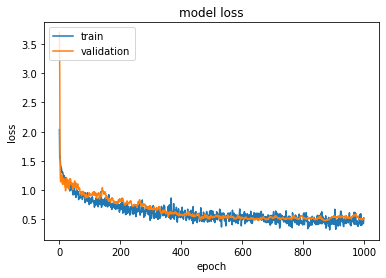

In [1067]:
history = model.fit(train, y_train, epochs=1000, batch_size=10, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Se puede observar que al reducir la cantidad de neuronas o capas las métricas del modelo se reducen (underfitting), y al aumentarlas no hay un cambio significativo.

Por lo cual el modelo con el que se realizará la prueba con el dataset de test será el de 4 capas ocultas, con optimizador Adagrad, tamaño de batch de 10 y learning rate de 0.05

## Metricas del Modelo

In [1102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [1079]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LeakyReLU())) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LeakyReLU(), kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [1080]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

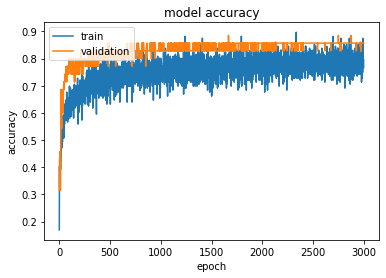

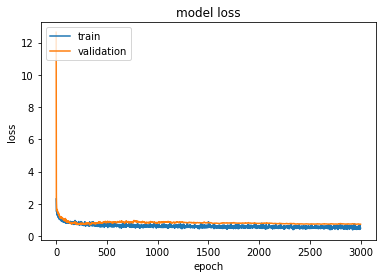

In [1081]:
history = model.fit(train, y_train, epochs=3000, batch_size=10, verbose=0, validation_data=(validation, y_validation))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [1100]:
predict = model.predict_classes(validation)

In [1101]:
accuracy_score(y_validation, predict)

0.8571428571428571

In [1110]:
precision_score(y_validation, predict, average = 'macro')

0.8777777777777779

In [1111]:
recall_score(y_validation, predict, average = 'macro')

0.8666666666666666

In [1112]:
f1_score(y_validation, predict, average = 'macro')

0.8675324675324674

## Checkpoints

Se realizará un ejemplo de como generar y cargar checkpoints con pocos Epochs por cuestión de tiempo de entrenamiento.

In [23]:
from keras.callbacks import ModelCheckpoint
import os

In [24]:
LR = LeakyReLU()
LR.__name__ = 'relu'

In [1277]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LR)) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation=LR, kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LR, kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LR, kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [1278]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

In [1279]:
filepath="Checkpoint.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [1280]:
model.fit(train, y_train, epochs=100, batch_size=10, validation_data=(validation, y_validation), callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.48571, saving model to Checkpoint.hdf5

Epoch 00002: val_accuracy did not improve from 0.48571

Epoch 00003: val_accuracy did not improve from 0.48571

Epoch 00004: val_accuracy did not improve from 0.48571

Epoch 00005: val_accuracy did not improve from 0.48571

Epoch 00006: val_accuracy did not improve from 0.48571

Epoch 00007: val_accuracy did not improve from 0.48571

Epoch 00008: val_accuracy did not improve from 0.48571

Epoch 00009: val_accuracy did not improve from 0.48571

Epoch 00010: val_accuracy did not improve from 0.48571

Epoch 00011: val_accuracy did not improve from 0.48571

Epoch 00012: val_accuracy improved from 0.48571 to 0.51429, saving model to Checkpoint.hdf5

Epoch 00013: val_accuracy did not improve from 0.51429

Epoch 00014: val_accuracy improved from 0.51429 to 0.60000, saving model to Checkpoint.hdf5

Epoch 00015: val_accuracy did not improve from 0.60000

Epoch 00016: val_accuracy did not improve from 0.60

In [1274]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [1275]:
model.fit(train, y_train, epochs=100, batch_size=10, validation_data=(validation, y_validation), callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.25714, saving model to weights-improvement-01-0.26.hdf5

Epoch 00002: val_accuracy improved from 0.25714 to 0.34286, saving model to weights-improvement-02-0.34.hdf5

Epoch 00003: val_accuracy did not improve from 0.34286

Epoch 00004: val_accuracy did not improve from 0.34286

Epoch 00005: val_accuracy improved from 0.34286 to 0.54286, saving model to weights-improvement-05-0.54.hdf5

Epoch 00006: val_accuracy did not improve from 0.54286

Epoch 00007: val_accuracy did not improve from 0.54286

Epoch 00008: val_accuracy did not improve from 0.54286

Epoch 00009: val_accuracy did not improve from 0.54286

Epoch 00010: val_accuracy did not improve from 0.54286

Epoch 00011: val_accuracy did not improve from 0.54286

Epoch 00012: val_accuracy did not improve from 0.54286

Epoch 00013: val_accuracy did not improve from 0.54286

Epoch 00014: val_accuracy did not improve from 0.54286

Epoch 00015: val_accuracy did not improve from 0.54286



# Cargando el Checkpoint

In [26]:
model = Sequential()
model.add(Dense(18, input_dim=9, activation=LR)) # 9 neuronas de entrada, 5 neuronas segunda capa
model.add(BatchNormalization())
model.add(Dense(14, activation=LR, kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(9, activation=LR, kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(5, activation=LR, kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.)))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax', kernel_initializer=initializers.TruncatedNormal(mean=1., stddev=1.))) # 1 neurona de salida

In [27]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adagrad(learning_rate=0.05), 
              metrics=['accuracy'])

In [28]:
model.load_weights("Checkpoint.hdf5")

In [30]:
model.evaluate(validation, y_validation)

35/35 [==============================] - 0s 143us/step


[1.0207136409623283, 0.6000000238418579]

# Conclusiones

Para la red neuronal del tipo MLP se eligió hacerlo con un modelo Sequential en Keras donde las capas van en secuencia ordenada una tras de otra. 

El problema bajo estudio trata acerca de clasificar tipos de vidrio según las features de entrada que representan los componentes que conforman el vidrio.

Se emplearon tres fases de experimentación:
1. Experimentos con diferentes optimizadores
2. Experimentos con diferente función de activación en capas ocultas y variando tamaño del batch
3. Variación en la arquitectura de la red neuronal

En cada fase se eligió el mejor modelo resultante de cada una con base a métrica en el dataset de validación. Luego de varios experimentos se encontró que el modelo que mejor predicciones generaba es el que tiene un optimizador de Adagrad, con tamaño de batch de 10, función de activación en capas internas de LeakyRelu y con 4 capas ocultas.

Con este modelo en el set de validación se obtiene como resultado en las métricas de Accuracy, Precision, Recall y F1-Score arriba de 85%. 

En cuanto al checkpoint, dado que se utilizó un modelo Sequential en Keras se puede hacer uso de la función ModelCheckpoint y se puede especificar si se requiere guardar únicamente los parámetros cuando hay una mejora en una métrica como en la de Accuracy, lo que fue empleado en el ejemplo. Luego se pasa el checkpoint como parámetro a la función fit para que se genere el checkpoint durante el entrenamiento.

Esto puede ser útil para tener puntos de control durante el entrenamiento por cualquier contingencia, ya que los entrenamientos en este tipo de modelos toma bastante tiempo. Por ejemplo, al momento de estar entrenando la red con 3000 epochs y un batch de 10 me tomó alrededor de 15 minutos, para modelos más complejos el tiempo puede ser significativamente mayor. Además el checkpoint también puede ser usado como deployment al guardar los parámetros de entrenamiento, por lo que pueden ser cargados posteriormente en alguna otra aplicación para su uso.